## Setup Instructions

Before running this notebook, ensure you have the required packages installed:

```bash
pip install tensorflow torch torchvision seaborn scikit-learn matplotlib numpy
```

Or if using conda:
```bash
conda install tensorflow pytorch torchvision seaborn scikit-learn matplotlib numpy -c conda-forge
```

# Multilayer Perceptron (MLP): TensorFlow/Keras vs PyTorch

## Framework Comparison Overview

| Aspect | TensorFlow/Keras | PyTorch |
|--------|------------------|---------|
| **Design Philosophy** | High-level, functional API with pre-built components | Object-oriented, class-based approach with more explicit control |
| **Model Definition** | Uses `Sequential()` or Functional API with pre-defined layers | Inherits from `nn.Module` and defines custom classes |
| **Layer Creation** | Pre-built layer functions: `Dense()`, `Flatten()`, etc. | Pre-built modules: `nn.Linear()`, `nn.Flatten()`, etc. |
| **Forward Pass** | Implicit - handled automatically | Explicit - must define `forward()` method |
| **Training Loop** | High-level `model.fit()` handles everything | Manual loop with explicit forward pass, loss calculation, backward pass |
| **Code Style** | Declarative/Functional | Imperative/Object-Oriented |
| **Abstraction Level** | Higher - more automated | Lower - more control and visibility |

In [3]:
# Install TensorFlow if not available
import subprocess
import sys

try:
    import tensorflow as tf
    print(f"TensorFlow {tf.__version__} already installed")
except ImportError:
    print("Installing TensorFlow...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--user", "tensorflow"])
    print("TensorFlow installed successfully!")

Installing TensorFlow...
TensorFlow installed successfully!


## 1. Setup and Imports

First, let's import all necessary libraries for both frameworks.

In [4]:
# Common libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# TensorFlow / Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist as tf_mnist

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"GPU available (TensorFlow): {tf.config.list_physical_devices('GPU')}")
print(f"GPU available (PyTorch): {torch.cuda.is_available()}")

TensorFlow version: 2.20.0
PyTorch version: 2.7.0+cpu
GPU available (TensorFlow): []
GPU available (PyTorch): False


## 2. Load and Explore the MNIST Dataset

MNIST contains 70,000 grayscale images of handwritten digits (0-9):
- Training set: 60,000 images
- Test set: 10,000 images
- Image size: 28x28 pixels

In [5]:
# Load MNIST dataset (we'll use TensorFlow's loader for both)
(x_train, y_train), (x_test, y_test) = tf_mnist.load_data()

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"\nPixel value range: [{x_train.min()}, {x_train.max()}]")
print(f"Unique labels: {np.unique(y_train)}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Pixel value range: [0, 255]
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)

Pixel value range: [0, 255]
Unique labels: [0 1 2 3 4 5 6 7 8 9]


### Visualize Sample Images

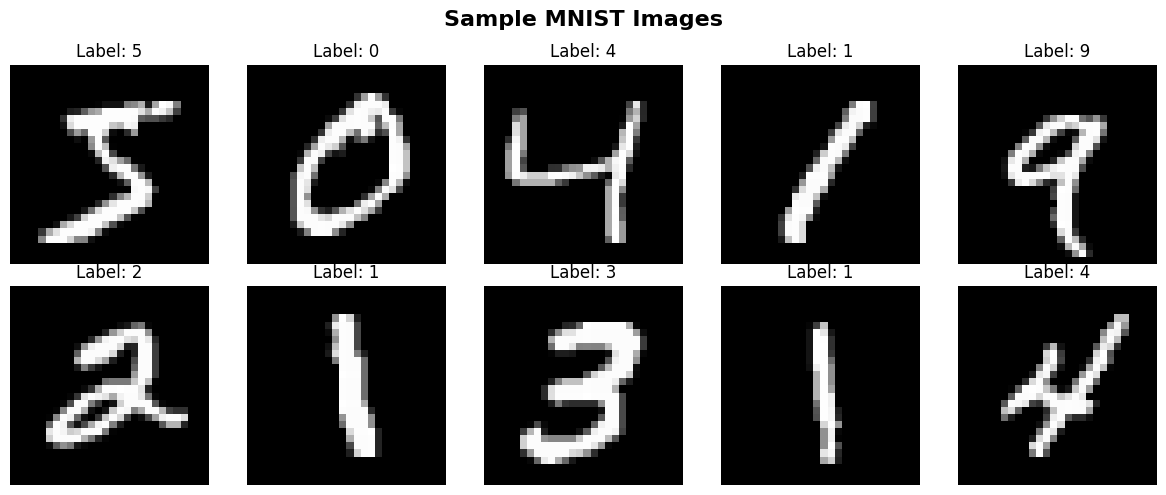

In [6]:
# Display sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.suptitle('Sample MNIST Images', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# ============================
# TENSORFLOW / KERAS VERSION
# ============================

# Flatten and normalize
x_train_tf = x_train.reshape(-1, 28*28).astype('float32') / 255.0
x_test_tf = x_test.reshape(-1, 28*28).astype('float32') / 255.0

# One-hot encode labels
y_train_tf = keras.utils.to_categorical(y_train, 10)
y_test_tf = keras.utils.to_categorical(y_test, 10)

print("TensorFlow/Keras Preprocessing:")
print(f"  X_train shape: {x_train_tf.shape}")
print(f"  Y_train shape: {y_train_tf.shape}")
print(f"  Data type: {x_train_tf.dtype}")
print(f"  Y_train sample: {y_train_tf[0]}")

TensorFlow/Keras Preprocessing:
  X_train shape: (60000, 784)
  Y_train shape: (60000, 10)
  Data type: float32
  Y_train sample: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# ============================
# PYTORCH VERSION
# ============================

# Flatten and normalize
x_train_pt = torch.FloatTensor(x_train.reshape(-1, 28*28)) / 255.0
x_test_pt = torch.FloatTensor(x_test.reshape(-1, 28*28)) / 255.0

# Convert labels to tensors (PyTorch uses class indices, not one-hot)
y_train_pt = torch.LongTensor(y_train)
y_test_pt = torch.LongTensor(y_test)

# Create DataLoader for batch processing
train_dataset_pt = TensorDataset(x_train_pt, y_train_pt)
test_dataset_pt = TensorDataset(x_test_pt, y_test_pt)

train_loader_pt = DataLoader(train_dataset_pt, batch_size=128, shuffle=True)
test_loader_pt = DataLoader(test_dataset_pt, batch_size=128, shuffle=False)

print("\nPyTorch Preprocessing:")
print(f"  X_train shape: {x_train_pt.shape}")
print(f"  Y_train shape: {y_train_pt.shape}")
print(f"  Data type: {x_train_pt.dtype}")
print(f"  Y_train sample: {y_train_pt[0].item()}")
print(f"  Number of batches: {len(train_loader_pt)}")


PyTorch Preprocessing:
  X_train shape: torch.Size([60000, 784])
  Y_train shape: torch.Size([60000])
  Data type: torch.float32
  Y_train sample: 5
  Number of batches: 469


## 4. Build the MLP Model

### Architecture:
- **Input Layer**: 784 neurons (28×28 flattened)
- **Hidden Layer 1**: 128 neurons + ReLU activation
- **Hidden Layer 2**: 64 neurons + ReLU activation
- **Output Layer**: 10 neurons (one per digit) + Softmax

### Key Differences:

| Aspect | TensorFlow/Keras | PyTorch |
|--------|------------------|----------|
| **Model Definition** | Sequential API (layer-by-layer) | Class-based (inherit from nn.Module) |
| **Syntax** | Declarative (what layers) | Imperative (how data flows) |
| **Activation** | Included in layer definition | Separate layer or in forward() |
| **Compilation** | Requires compile() step | No compilation needed |
| **Forward Pass** | Automatic | Explicit forward() method |

### TensorFlow/Keras: Sequential API

In [9]:
# ============================
# TENSORFLOW / KERAS MODEL
# ============================

model_tf = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,), name='hidden1'),
    layers.Dense(64, activation='relu', name='hidden2'),
    layers.Dense(10, activation='softmax', name='output')
])

# Compile the model (optimizer, loss, metrics)
model_tf.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
print("TensorFlow/Keras Model:")
model_tf.summary()

TensorFlow/Keras Model:


C:\Users\romerod2\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### PyTorch: Class-Based Definition

In [10]:
# ============================
# PYTORCH MODEL
# ============================

class MLP_PyTorch(nn.Module):
    def __init__(self, input_size=784, hidden1=128, hidden2=64, num_classes=10):
        super(MLP_PyTorch, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, num_classes)
        
    def forward(self, x):
        # Define forward pass
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        # Note: No softmax here - CrossEntropyLoss includes it
        return x

# Instantiate the model
model_pt = MLP_PyTorch()

# Define loss function and optimizer
criterion_pt = nn.CrossEntropyLoss()
optimizer_pt = optim.Adam(model_pt.parameters())

# Display model architecture
print("PyTorch Model:")
print(model_pt)
print(f"\nTotal parameters: {sum(p.numel() for p in model_pt.parameters())}")

PyTorch Model:
MLP_PyTorch(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Total parameters: 109386


## 5. Training the Models

### Training Process Differences:

| Step | TensorFlow/Keras | PyTorch |
|------|------------------|----------|
| **Training** | `model.fit()` - one line! | Manual training loop required |
| **Batch Processing** | Automatic | Manual iteration over DataLoader |
| **Gradient Computation** | Automatic | Manual `loss.backward()` |
| **Weight Updates** | Automatic | Manual `optimizer.step()` |
| **History Tracking** | Built-in | Manual tracking |

### TensorFlow/Keras: One-Line Training

In [12]:
# ============================
# TENSORFLOW / KERAS TRAINING
# ============================

print("Training TensorFlow/Keras Model...\\n")

start_time_tf = time.time()

# Train the model
history_tf = model_tf.fit(
    x_train_tf, y_train_tf,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

training_time_tf = time.time() - start_time_tf

print(f"\\nTraining completed in {training_time_tf:.2f} seconds")

Training TensorFlow/Keras Model...\n
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9016 - loss: 0.3493 - val_accuracy: 0.9598 - val_loss: 0.1404
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9016 - loss: 0.3493 - val_accuracy: 0.9598 - val_loss: 0.1404
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9574 - loss: 0.1450 - val_accuracy: 0.9695 - val_loss: 0.1043
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9574 - loss: 0.1450 - val_accuracy: 0.9695 - val_loss: 0.1043
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0991 - val_accuracy: 0.9722 - val_loss: 0.0942
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.0991 - val_accuracy: 0.9722 - val_loss: 0.0942
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9784 - loss: 0.0733 - val_accuracy: 0.9750 - val_loss: 0.0881
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9

### PyTorch: Manual Training Loop

In [14]:
# ============================
# PYTORCH TRAINING
# ============================

print("Training PyTorch Model...\\n")

# Training configuration
epochs = 10
history_pt = {'loss': [], 'accuracy': []}

start_time_pt = time.time()

# Training loop
model_pt.train()  # Set model to training mode

for epoch in range(epochs):
    epoch_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader_pt):
        # Zero the gradients
        optimizer_pt.zero_grad()
        
        # Forward pass
        outputs = model_pt(data)
        
        # Calculate loss
        loss = criterion_pt(outputs, target)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer_pt.step()
        
        # Track metrics
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
    
    # Calculate epoch metrics
    avg_loss = epoch_loss / len(train_loader_pt)
    accuracy = 100 * correct / total
    
    history_pt['loss'].append(avg_loss)
    history_pt['accuracy'].append(accuracy)
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

training_time_pt = time.time() - start_time_pt

print(f"\\nTraining completed in {training_time_pt:.2f} seconds")

Training PyTorch Model...\n
Epoch [1/10], Loss: 0.4169, Accuracy: 88.36%
Epoch [2/10], Loss: 0.1746, Accuracy: 94.88%
Epoch [3/10], Loss: 0.1212, Accuracy: 96.45%
Epoch [4/10], Loss: 0.0922, Accuracy: 97.24%
Epoch [5/10], Loss: 0.0719, Accuracy: 97.87%
Epoch [6/10], Loss: 0.0589, Accuracy: 98.17%
Epoch [7/10], Loss: 0.0479, Accuracy: 98.51%
Epoch [8/10], Loss: 0.0400, Accuracy: 98.82%
Epoch [9/10], Loss: 0.0320, Accuracy: 99.02%
Epoch [10/10], Loss: 0.0279, Accuracy: 99.16%
\nTraining completed in 58.15 seconds


### Training Time Comparison

In [15]:
print("="*60)
print("TRAINING TIME COMPARISON")
print("="*60)
print(f"TensorFlow/Keras: {training_time_tf:.2f} seconds")
print(f"PyTorch:          {training_time_pt:.2f} seconds")
print(f"Difference:       {abs(training_time_tf - training_time_pt):.2f} seconds")
print("="*60)

TRAINING TIME COMPARISON
TensorFlow/Keras: 15.97 seconds
PyTorch:          58.15 seconds
Difference:       42.17 seconds


## 6. Visualize Training History

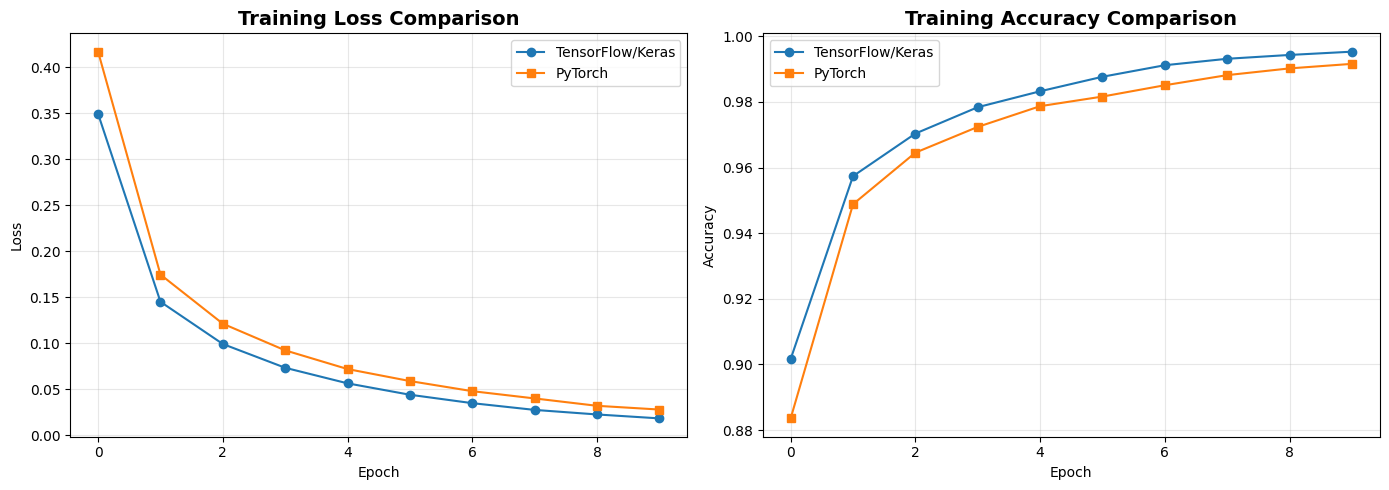

In [16]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss comparison
axes[0].plot(history_tf.history['loss'], label='TensorFlow/Keras', marker='o')
axes[0].plot(history_pt['loss'], label='PyTorch', marker='s')
axes[0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy comparison
axes[1].plot(history_tf.history['accuracy'], label='TensorFlow/Keras', marker='o')
axes[1].plot([acc/100 for acc in history_pt['accuracy']], label='PyTorch', marker='s')
axes[1].set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Model Evaluation

### Evaluation Differences:

| Aspect | TensorFlow/Keras | PyTorch |
|--------|------------------|----------|
| **Evaluation** | `model.evaluate()` | Manual evaluation loop |
| **Prediction** | `model.predict()` | `model(data)` in eval mode |
| **Mode Setting** | Automatic | Manual `.eval()` |

### TensorFlow/Keras Evaluation

In [17]:
# ============================
# TENSORFLOW / KERAS EVALUATION
# ============================

print("Evaluating TensorFlow/Keras Model...\n")

# Evaluate on test set
test_loss_tf, test_acc_tf = model_tf.evaluate(x_test_tf, y_test_tf, verbose=0)

# Get predictions
y_pred_probs_tf = model_tf.predict(x_test_tf, verbose=0)
y_pred_tf = np.argmax(y_pred_probs_tf, axis=1)
y_true_tf = np.argmax(y_test_tf, axis=1)

print(f"Test Loss:     {test_loss_tf:.4f}")
print(f"Test Accuracy: {test_acc_tf*100:.2f}%")

Evaluating TensorFlow/Keras Model...

Test Loss:     0.0943
Test Accuracy: 97.30%
Test Loss:     0.0943
Test Accuracy: 97.30%


### PyTorch Evaluation

In [18]:
# ============================
# PYTORCH EVALUATION
# ============================

print("Evaluating PyTorch Model...\n")

model_pt.eval()  # Set model to evaluation mode

test_loss_pt = 0.0
correct = 0
total = 0
y_pred_pt = []
y_true_pt = []

with torch.no_grad():  # Disable gradient computation
    for data, target in test_loader_pt:
        outputs = model_pt(data)
        loss = criterion_pt(outputs, target)
        
        test_loss_pt += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        y_pred_pt.extend(predicted.numpy())
        y_true_pt.extend(target.numpy())

test_loss_pt /= len(test_loader_pt)
test_acc_pt = 100 * correct / total

print(f"Test Loss:     {test_loss_pt:.4f}")
print(f"Test Accuracy: {test_acc_pt:.2f}%")

Evaluating PyTorch Model...

Test Loss:     0.0802
Test Accuracy: 97.63%
Test Loss:     0.0802
Test Accuracy: 97.63%


### Performance Comparison

In [19]:
print("\n" + "="*70)
print("FINAL PERFORMANCE COMPARISON")
print("="*70)
print(f"{'Metric':<30} {'TensorFlow/Keras':<20} {'PyTorch':<20}")
print("="*70)
print(f"{'Test Accuracy':<30} {test_acc_tf*100:>18.2f}% {test_acc_pt:>18.2f}%")
print(f"{'Test Loss':<30} {test_loss_tf:>20.4f} {test_loss_pt:>20.4f}")
print(f"{'Training Time (seconds)':<30} {training_time_tf:>20.2f} {training_time_pt:>20.2f}")
print("="*70)


FINAL PERFORMANCE COMPARISON
Metric                         TensorFlow/Keras     PyTorch             
Test Accuracy                               97.30%              97.63%
Test Loss                                    0.0943               0.0802
Training Time (seconds)                       15.97                58.15


## 8. Confusion Matrix Comparison

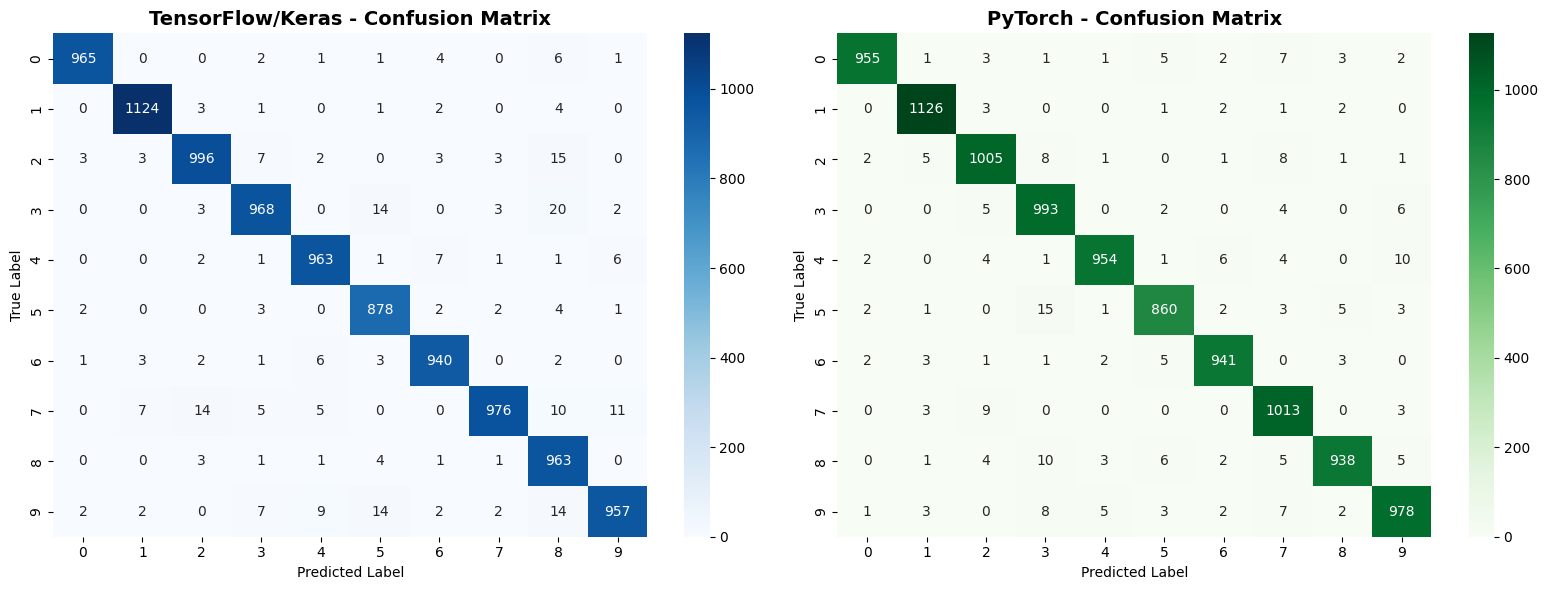

In [20]:
# Create confusion matrices
cm_tf = confusion_matrix(y_true_tf, y_pred_tf)
cm_pt = confusion_matrix(y_true_pt, y_pred_pt)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# TensorFlow confusion matrix
sns.heatmap(cm_tf, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=range(10), yticklabels=range(10))
axes[0].set_title('TensorFlow/Keras - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# PyTorch confusion matrix
sns.heatmap(cm_pt, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=range(10), yticklabels=range(10))
axes[1].set_title('PyTorch - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

## 9. Detailed Classification Reports

In [21]:
print("="*70)
print("TENSORFLOW/KERAS - Classification Report")
print("="*70)
print(classification_report(y_true_tf, y_pred_tf, target_names=[str(i) for i in range(10)]))

print("\n" + "="*70)
print("PYTORCH - Classification Report")
print("="*70)
print(classification_report(y_true_pt, y_pred_pt, target_names=[str(i) for i in range(10)]))

TENSORFLOW/KERAS - Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.96      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.99      0.95      0.97      1028
           8       0.93      0.99      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


PYTORCH - Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.99      0.99      1135
    

## 10. Sample Predictions

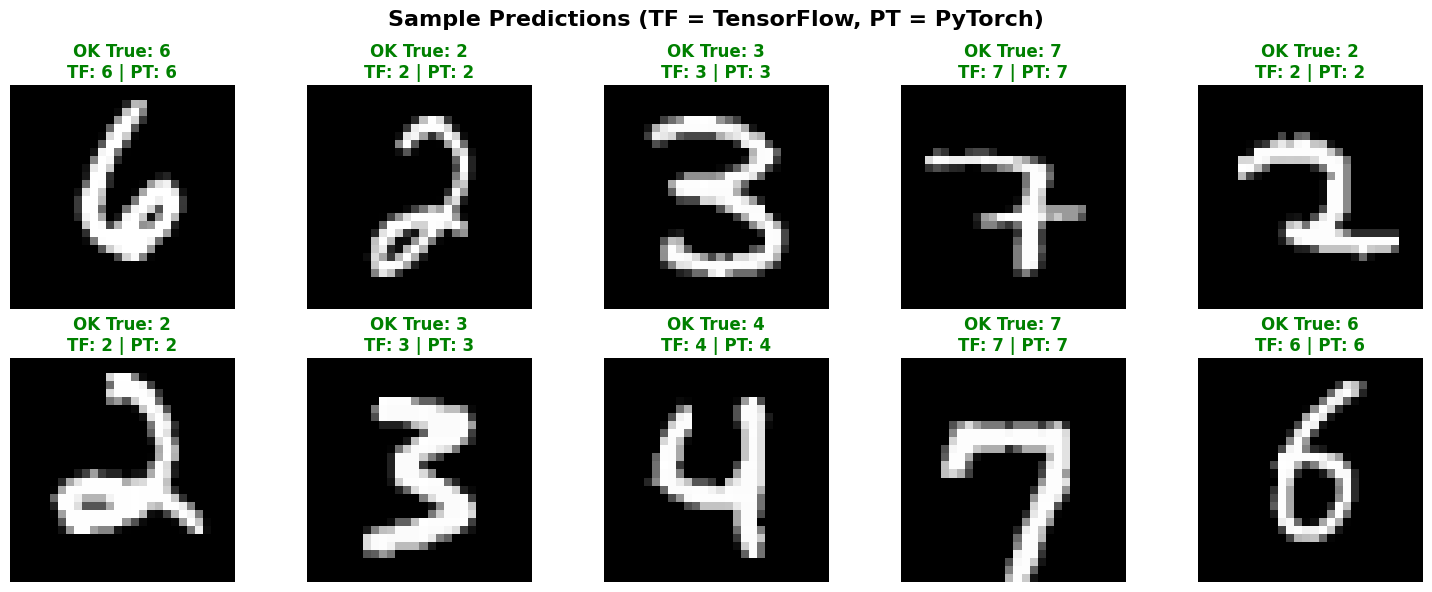

In [22]:
# Display sample predictions
n_samples = 10
sample_indices = np.random.choice(len(x_test), n_samples, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for idx, ax in enumerate(axes.flat):
    sample_idx = sample_indices[idx]
    
    # Get predictions from both models
    pred_tf = y_pred_tf[sample_idx]
    pred_pt = y_pred_pt[sample_idx]
    true_label = y_test[sample_idx]
    
    # Display image
    ax.imshow(x_test[sample_idx], cmap='gray')
    
    # Color code: green if both correct, red if both wrong, yellow if different
    if pred_tf == true_label and pred_pt == true_label:
        color = 'green'
        status = 'OK'
    elif pred_tf != true_label and pred_pt != true_label:
        color = 'red'
        status = 'X'
    else:
        color = 'orange'
        status = '!'
    
    ax.set_title(f"{status} True: {true_label}\nTF: {pred_tf} | PT: {pred_pt}", 
                 color=color, fontweight='bold')
    ax.axis('off')

plt.suptitle('Sample Predictions (TF = TensorFlow, PT = PyTorch)', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 11. Saving and Loading Models

### Model Saving Differences

In [25]:
import os
os.makedirs('saved_models', exist_ok=True)

# ============================
# TENSORFLOW / KERAS SAVING
# ============================
print("Saving TensorFlow/Keras model...")

# Method 1: Save entire model
model_tf.save('saved_models/mnist_model_tf.keras')

# Method 2: Save weights only
model_tf.save_weights('saved_models/mnist_model_tf.weights.h5')

print("  TensorFlow model saved")

# ============================
# PYTORCH SAVING
# ============================
print("\\nSaving PyTorch model...")

# Method 1: Save entire model
torch.save(model_pt, 'saved_models/mnist_model_pt.pth')

# Method 2: Save state dict (recommended)
torch.save({
    'model_state_dict': model_pt.state_dict(),
    'optimizer_state_dict': optimizer_pt.state_dict(),
    'test_accuracy': test_acc_pt,
}, 'saved_models/mnist_checkpoint_pt.pth')

print("  PyTorch model saved")

print("\\n" + "="*70)
print("All models saved successfully")
print("="*70)

Saving TensorFlow/Keras model...
  TensorFlow model saved
\nSaving PyTorch model...
  PyTorch model saved
\n======================================================================
All models saved successfully


### Loading Models

In [26]:
# ============================
# TENSORFLOW / KERAS LOADING
# ============================
print("Loading TensorFlow/Keras model...")

# Load entire model
loaded_model_tf = keras.models.load_model('saved_models/mnist_model_tf.keras')
print("  TensorFlow model loaded")

# ============================
# PYTORCH LOADING
# ============================
print("\\nLoading PyTorch model...")

# Load entire model
loaded_model_pt = torch.load('saved_models/mnist_model_pt.pth', weights_only=False)

# Or load state dict
checkpoint = torch.load('saved_models/mnist_checkpoint_pt.pth', weights_only=False)
model_pt_loaded = MLP_PyTorch()
model_pt_loaded.load_state_dict(checkpoint['model_state_dict'])
model_pt_loaded.eval()

print("  PyTorch model loaded")
print(f"  Saved test accuracy: {checkpoint['test_accuracy']:.2f}%")

Loading TensorFlow/Keras model...
  TensorFlow model loaded
\nLoading PyTorch model...
  PyTorch model loaded
  Saved test accuracy: 97.63%
  TensorFlow model loaded
\nLoading PyTorch model...
  PyTorch model loaded
  Saved test accuracy: 97.63%


C:\Users\romerod2\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## 12. Summary: TensorFlow vs PyTorch

### When to Use TensorFlow/Keras:

**Best for:**
- Beginners learning deep learning
- Quick prototyping and experimentation
- Production deployment (TensorFlow Serving, TF Lite)
- Projects requiring less code and faster development
- When you want high-level abstractions

**Limitations:**
- Less flexibility for custom architectures
- Harder to debug complex models
- Less Pythonic

### When to Use PyTorch:

**Best for:**
- Research and experimentation
- Custom architectures and loss functions
- Projects requiring fine-grained control
- Dynamic computational graphs
- When you need to debug complex models

**Limitations:**
- More boilerplate code
- Steeper learning curve
- Requires manual training loops

---

### Code Complexity Comparison:

| Task | TensorFlow/Keras | PyTorch |
|------|------------------|----------|
| **Model Definition** | ~5 lines | ~15 lines |
| **Training** | 1 line | ~20 lines |
| **Evaluation** | 1 line | ~15 lines |
| **Total Code** | Minimal | More verbose |

### Performance:
Both frameworks offer similar performance for standard MLPs. Differences are typically negligible for most use cases.

### Conclusion:
- **For learning**: Start with TensorFlow/Keras
- **For research**: Use PyTorch
- **For production**: Consider TensorFlow
- **For flexibility**: Choose PyTorch

Both are excellent frameworks - your choice depends on your specific needs and preferences!

   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "## 13. Practice Exercises\n",
    "\n",
    "Try these exercises to reinforce your learning:\n",
    "\n",
    "1. Add Dropout: Add dropout layers (0.3) to both models to reduce overfitting\n",
    "2. Change Architecture: Modify to have 3 hidden layers (256, 128, 64 neurons)\n",
    "3. Try Different Optimizers: Compare SGD vs Adam vs RMSprop\n",
    "4. Learning Rate: Experiment with different learning rates (0.001, 0.01, 0.0001)\n",
    "5. Batch Size: Test different batch sizes (32, 64, 256, 512)\n",
    "6. Add BatchNormalization: Add batch normalization layers\n",
    "7. Different Activation: Try tanh or LeakyReLU instead of ReLU\n",
    "8. Early Stopping: Implement early stopping in both frameworks\n",
    "9. Learning Rate Scheduling: Add learning rate decay\n",
    "10. Model Ensemble: Combine predictions from both models"
   ]

---

## Additional Resources

**TensorFlow/Keras:**
- [Official TensorFlow Tutorials](https://www.tensorflow.org/tutorials)
- [Keras Documentation](https://keras.io/)

**PyTorch:**
- [Official PyTorch Tutorials](https://pytorch.org/tutorials/)
- [PyTorch Documentation](https://pytorch.org/docs/)

**General:**
- [Deep Learning Specialization](https://www.deeplearning.ai/)
- [Fast.ai Course](https://www.fast.ai/)

---

*Created for Introduction to Machine Learning Course*  
*SUNY Polytechnic Institute*